In [2]:
from The_Payne import utils
from The_Payne import spectral_model
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
%matplotlib inline

df = np.loadtxt('/Users/ioanaciuca/Desktop/MockSpectra/Sync_Spectra_All/at12_aaaaa_t04534g2.24.spec')
wavelength_ini=df[:,0]

temp = np.load("/Users/ioanaciuca/Desktop/The_Payne/apogee_NN_normalized_spectra.npz")

w_array_0 = temp["w_array_0"]
w_array_1 = temp["w_array_1"]
w_array_2 = temp["w_array_2"]
b_array_0 = temp["b_array_0"]
b_array_1 = temp["b_array_1"]
b_array_2 = temp["b_array_2"]
x_min = temp["x_min"]
x_max = temp["x_max"]
temp.close()

NN_coeffs = [w_array_0, w_array_1, w_array_2, b_array_0, b_array_1, b_array_2, x_min, x_max]

In [5]:
from scipy import signal
from scipy.stats import norm

import numpy as np
import glob
import pandas as pd
from numpy import load

import sys
sys.path.append('../')

from scripts.spectral_analysis import pipeline_fullw as pipeline

from The_Payne import utils
from The_Payne import spectral_model
from The_Payne import fitting

# the following will be used throughout all routines
# these are the default for fitting APOGEE spectra 
# substitutes them if you train different neural networks for other purposes
# the instruction for training a new Payne is included at the end of this tutorial

# read in the default wavelength array, 
#         the apogee mask/filter used for fitting spectra : True = excluded
wavelength = utils.load_wavelength_array()
mask = utils.load_apogee_mask()

In [6]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

step_size = np.array([0.05, 0.1, 0.1,\
                       0.05, 0.05, 0.05, 0.05, 0.05,\
                       0.05, 0.05, 0.05, 0.05, 0.05,\
                       0.05, 0.05, 0.05, 0.05, 0.05,\
                       0.05, 0.05, 0.05, 0.05])

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

# for a single-star model, the format of "labels" is [Teff, Logg, Vturb [km/s],
#              [C/H], [N/H], [O/H], [Na/H], [Mg/H],\
#              [Al/H], [Si/H], [P/H], [S/H], [K/H],\
#              [Ca/H], [Ti/H], [V/H], [Cr/H], [Mn/H],\
#              [Fe/H], [Co/H], [Ni/H], [Cu/H], [Ge/H],\
#              C12/C13, Vmacro [km/s], radial velocity (RV)

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
real_spec = utils.doppler_shift(wavelength_ini, reference_spec, 0.0) #rv of 0. just for cheking.

In [7]:
waveout, reference_spec = pipeline(wavelength, wavelength_ini, reference_spec)
waveout1, reference_spec1 = pipeline(wavelength, wavelength_ini, real_spec)
len(waveout)

7214

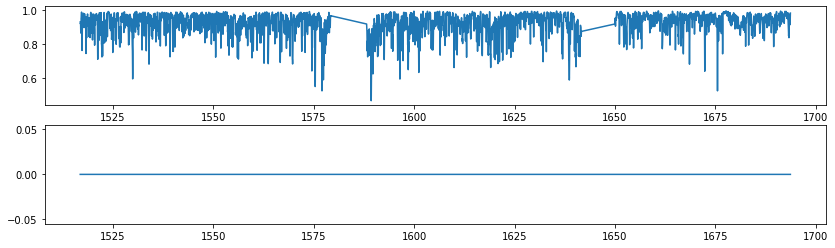

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 4))


ax1.plot(waveout, reference_spec)
ax2.plot(waveout1, reference_spec1-reference_spec)

In [8]:
len(scaled_labels)

22

> take spectra, deconvolve and sample at 7214 wavelengths

(22, 7214)


(-0.02, 0.02)

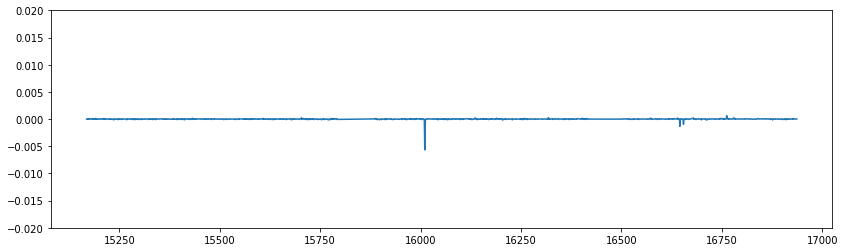

In [9]:
# make gradient spectra
gradient_spectra = []
for i in range(len(real_labels)):
    scaled_labels = np.copy(real_labels)
    scaled_labels[i] = scaled_labels[i] + step_size[i]
    scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
    diff_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
    waveout, diff_spec = pipeline(wavelength, wavelength_ini, diff_spec)
    gradient_spectra.append(diff_spec-reference_spec)
    
gradient_spectra = np.array(gradient_spectra)
print(gradient_spectra.shape)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(waveout*10, gradient_spectra[21])
ax.set_ylim(-0.02, 0.02)

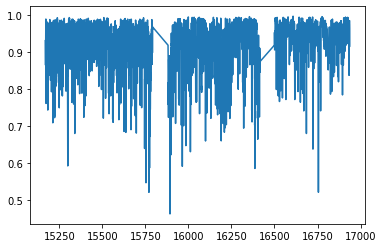

In [10]:
plt.plot(wavelength, reference_spec)

> Get line lists

> cuh lines

14

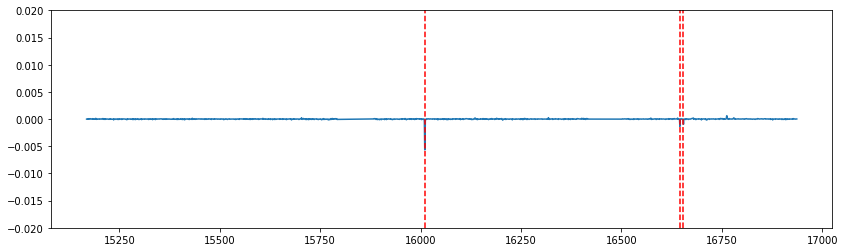

In [12]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0., 0., 0.0, 0.,\
                         0.0, 0.0, 0.0, 0.05])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

df = df.sort_values(by='diff_spectra', ascending=True)


df_cuh = df[df['diff_spectra'] < -0.0008]
cuh_lines = [df_cuh.loc[3506].wavelength, df_cuh.loc[5958].wavelength, df_cuh.loc[5997].wavelength ]

for x in cuh_lines:
    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_cuh)



In [ ]:
np.savetxt('cuh_lines.txt', cuh_lines) #saving the right information

> nih lines

111

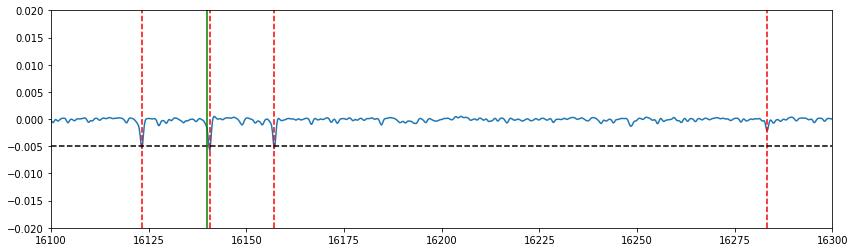

In [192]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0., 0., 0.0, 0.,\
                         0.0, 0.0, 0.05, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_nih = df[df['diff_spectra'] < -0.002]

nih_lines = [df.loc[46].wavelength, df.loc[170].wavelength, df.loc[603].wavelength, df.loc[1844].wavelength, 
             df.loc[2079].wavelength, df.loc[2204].wavelength, df.loc[2637].wavelength, df.loc[2761].wavelength, 
             df.loc[3122].wavelength,  df.loc[3541].wavelength, df.loc[4014].wavelength, df.loc[4092].wavelength, 
             df.loc[4166].wavelength, df.loc[4729].wavelength, df.loc[4870].wavelength, df.loc[5103].wavelength,  
             df.loc[5501].wavelength, df.loc[5562].wavelength, df.loc[5711].wavelength, df.loc[5733].wavelength,  
             df.loc[5896].wavelength, df.loc[6101].wavelength, df.loc[6713].wavelength, df.loc[6727].wavelength, 
             df.loc[6935].wavelength]

for x in nih_lines:
    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

ax.axhline(y=-0.005, color='k', ls='--')
ax.set_xlim(16100, 16300)
ax.axvline(x=16140, color='g')

len(df_nih)




In [ ]:
df_nih.index[50:]

In [ ]:
np.savetxt('nih_lines.txt', nih_lines) #saving the right information

In [ ]:
len(nih_lines)

> coh lines

87

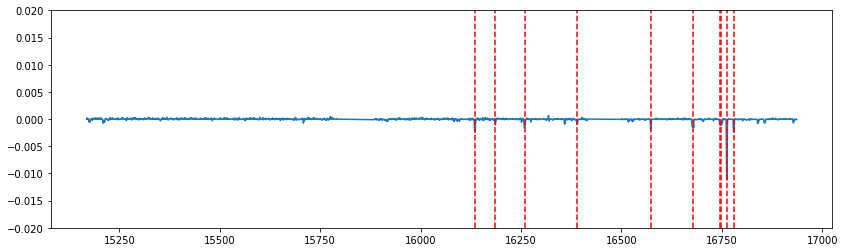

In [15]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0., 0., 0.0, 0.,\
                         0.0, 0.05, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_coh = df[df['diff_spectra'] < -0.001]

coh_lines = [df.loc[4067].wavelength, df.loc[4296].wavelength, df.loc[4621].wavelength, df.loc[5200].wavelength, \
             df.loc[5643].wavelength, df.loc[6098].wavelength, df.loc[6389].wavelength, df.loc[6399].wavelength, \
             df.loc[6464].wavelength,df.loc[6539].wavelength]

for x in coh_lines:
    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_coh)


In [ ]:
df_coh.index

In [ ]:
len(df_coh)

In [ ]:
coh_lines = [df.loc[4067].wavelength, df.loc[4296].wavelength, df.loc[4621].wavelength, df.loc[5200].wavelength, \
             df.loc[5643].wavelength, df.loc[6098].wavelength, df.loc[6389].wavelength, df.loc[6399].wavelength, \
             df.loc[6464].wavelength,df.loc[6539].wavelength]

In [ ]:
len(coh_lines)

In [ ]:
np.savetxt('coh_lines.txt', coh_lines) #saving the right information

> mnh lines

44

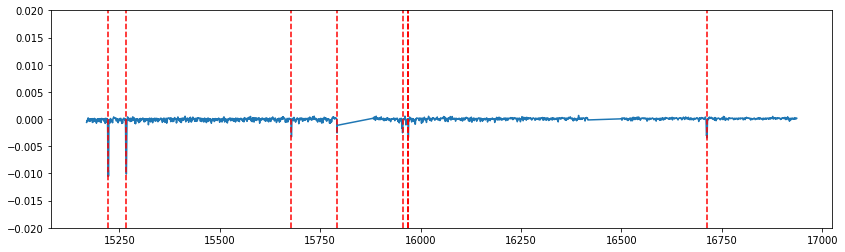

In [16]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0., 0., 0.0, 0.05,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_mnh = df[df['diff_spectra'] < -0.0025]
mnh_lines = [df.loc[257].wavelength, df.loc[469].wavelength, df.loc[2394].wavelength,
             df.loc[2917].wavelength, df.loc[3255].wavelength, df.loc[3320].wavelength,
             df.loc[3320].wavelength, df.loc[3320].wavelength, df.loc[6248].wavelength,]

for x in mnh_lines:
    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_mnh)



In [ ]:
df_mnh.index

In [ ]:
mnh_lines = [df.loc[257].wavelength, df.loc[469].wavelength, df.loc[2394].wavelength,
             df.loc[2917].wavelength, df.loc[3255].wavelength, df.loc[3320].wavelength,
             df.loc[3320].wavelength, df.loc[3320].wavelength, df.loc[6248].wavelength,]

In [ ]:
np.savetxt('mnh_lines.txt', mnh_lines) #saving the right information

> crh lines

24

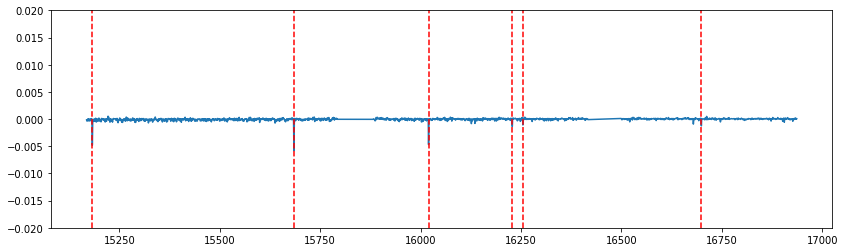

In [17]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0., 0., 0.05, 0.0,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_crh = df[df['diff_spectra'] < -0.001]

crh_lines = [df.loc[68].wavelength, df.loc[2423].wavelength, df.loc[3548].wavelength, \
            df.loc[4484].wavelength, df.loc[4602].wavelength, df.loc[6190].wavelength,]

for x in crh_lines:
    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_crh)




In [ ]:
df_crh.index

In [ ]:
crh_lines = [df.loc[68].wavelength, df.loc[2423].wavelength, df.loc[3548].wavelength, \
            df.loc[4484].wavelength, df.loc[4602].wavelength, df.loc[6190].wavelength,]

In [ ]:
len(crh_lines)

In [ ]:
np.savetxt('crh_lines.txt', crh_lines) #saving the right information

In [ ]:
!pwd

> vh lines

56

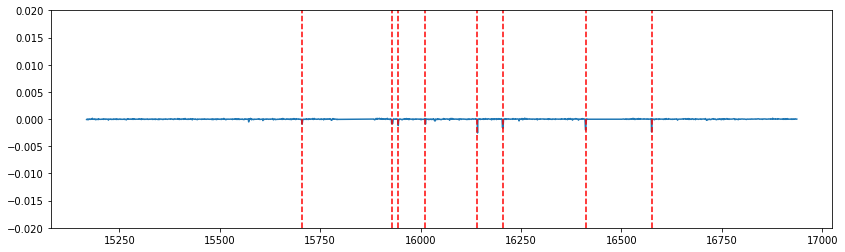

In [18]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0., 0.05, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_vh = df[df['diff_spectra'] < -0.00075]

vh_lines = [df.loc[2517].wavelength, df.loc[3137,].wavelength, df.loc[3206].wavelength, \
            df.loc[3513].wavelength, df.loc[4096].wavelength, df.loc[4379].wavelength, \
            df.loc[5293].wavelength, df.loc[5651].wavelength]

for x in vh_lines:
    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_vh)


In [ ]:
df_vh.index

In [ ]:
vh_lines = [df.loc[2517].wavelength, df.loc[3137,].wavelength, df.loc[3206].wavelength, \
            df.loc[3513].wavelength, df.loc[4096].wavelength, df.loc[4379].wavelength, \
            df.loc[5293].wavelength, df.loc[5651].wavelength]

In [ ]:
np.savetxt('vh_lines.txt', vh_lines) #saving the right information

> tih lines

18

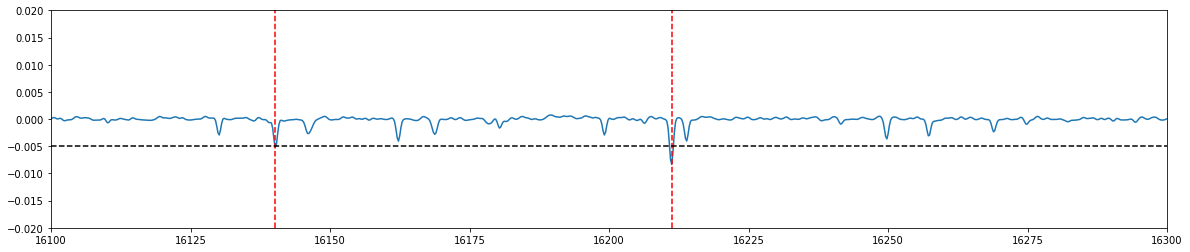

In [188]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0.1, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_tih = df[df['diff_spectra'] < -0.005]

tih_lines = [df.loc[108].wavelength,  
            df.loc[811].wavelength, df.loc[1114].wavelength, 
            df.loc[1245].wavelength,
             
             
            df.loc[1791].wavelength, df.loc[2066].wavelength, df.loc[2510].wavelength, 
            df.loc[2587].wavelength, 
            df.loc[3378].wavelength, df.loc[3388].wavelength, df.loc[3501].wavelength,
             
            df.loc[4090].wavelength, df.loc[4408].wavelength, 
             
            df.loc[4959].wavelength, df.loc[5104].wavelength, df.loc[5244].wavelength,
             
            df.loc[5874].wavelength, df.loc[5933].wavelength ]
i=0
for x in tih_lines:
    ax.axvline(x=x, color='r', ls='--')
    
    i=i+1
    

ax.set_ylim(-0.02, 0.02)
ax.axhline(y=-0.005, color='k', ls='--')
ax.set_xlim(16100, 16300)
len(df_tih)

len(tih_lines)

In [189]:
tih_lines[11]

16140.166108349096

In [190]:
df.loc[4090].wavelength,

(16140.166108349096,)

In [186]:
df.loc[4408].wavelength, 

(16211.231214377107,)

In [169]:
len(df_tih)


52

In [ ]:
df_tih.index[60:]

In [45]:
len(tih_lines)

37

In [171]:
np.savetxt('tih_lines.txt', tih_lines) #saving the right information

In [49]:
#before at dex of -0.002

tih_lines = [df.loc[108].wavelength, df.loc[321].wavelength, df.loc[720].wavelength, 
            df.loc[811].wavelength, df.loc[1029].wavelength, df.loc[1114].wavelength, 
            df.loc[1245].wavelength,
             
            df.loc[1791].wavelength, df.loc[2066].wavelength, df.loc[2510].wavelength, 
            df.loc[2587].wavelength, 
            df.loc[3378].wavelength, df.loc[3388].wavelength, df.loc[3501].wavelength,
             
            df.loc[4045].wavelength, df.loc[4090].wavelength, df.loc[4117].wavelength, df.loc[4189].wavelength,
            df.loc[4218].wavelength, df.loc[4354].wavelength, df.loc[4408].wavelength, df.loc[4831].wavelength,
             
            df.loc[4420].wavelength, df.loc[4580].wavelength, 
            df.loc[4613].wavelength,df.loc[4665].wavelength,
             
            df.loc[4959].wavelength, df.loc[5104].wavelength, df.loc[5244].wavelength, df.loc[5272].wavelength,
             
            df.loc[5759].wavelength, df.loc[5874].wavelength, df.loc[5933].wavelength, 
            df.loc[6322].wavelength, df.loc[6387].wavelength, df.loc[6915].wavelength, 
            df.loc[6980].wavelength,
            df.loc[7020].wavelength, ]
i=0

[15190.77740721463,
 15235.334716329528,
 15319.761351936808,
 15339.033643619177,
 15385.30109708376,
 15403.378951713026,
 15431.28172009062,
 15547.909354619163,
 15576.719523195236,
 15607.307964915715,
 15703.338774476608,
 15719.835606463022,
 15973.129034412228,
 15984.387523835492,
 16009.361082161668,
 16049.666037242063,
 16129.912073760177,
 16140.166108349096,
 16145.964750249486,
 16162.256690835058,
 16199.141537070687,
 16211.231214377107,
 16213.919034404562,
 16249.799247207986,
 16257.20941228173,
 16268.892894234592,
 16335.107617455707,
 16367.863704305251,
 16399.32602880821,
 16405.897731990994,
 16599.69085443017,
 16626.31483421034,
 16639.87271973812,
 16729.308888059717,
 16744.570025011028,
 16867.161374133742,
 16891.647116533888]

> kh lines

4

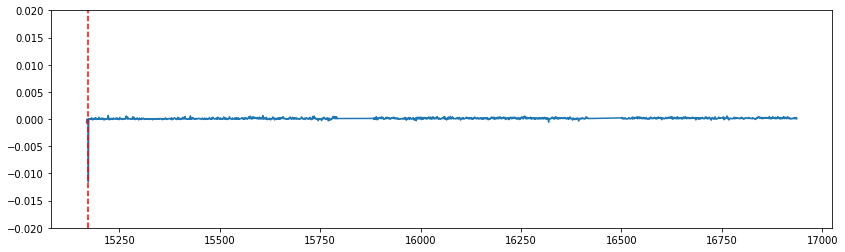

In [98]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.1,\
                         0., 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_kh = df[df['diff_spectra'] < -0.005]

for x in kh_lines:
  ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_kh)




In [ ]:
df_kh.index

In [80]:
kh_lines = [df_kh.loc[21].wavelength]

In [ ]:
np.savetxt('kh_lines.txt', kh_lines) #saving the right information

> sh lines

In [ ]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.05, 0.0,\
                         0., 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_sh = df[df['diff_spectra'] < -0.0015]

for x in sh_lines:
  ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_sh)


In [ ]:
#around 10 lines...

In [ ]:
df_sh.index

In [ ]:
sh_lines = [df.loc[1119].wavelength, df.loc[1136].wavelength, df.loc[1222].wavelength,
            df.loc[1445].wavelength, df.loc[1472].wavelength, df.loc[1486].wavelength,
            df.loc[2890].wavelength, df.loc[5529].wavelength, df.loc[5723].wavelength, df.loc[5750].wavelength]

In [ ]:
len(sh_lines)

In [ ]:
np.savetxt('sh_lines.txt', sh_lines) #saving the right information

> ph lines

In [ ]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.05, 0.0, 0.0,\
                         0., 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_ph = df[df['diff_spectra'] < -0.0005]

for x in ph_lines:
  ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_ph)



In [ ]:
df_ph.index

In [ ]:
ph_lines = [df.loc[2567].wavelength, df.loc[5735].wavelength, df.loc[6381].wavelength]

In [ ]:
np.savetxt('ph_lines.txt', ph_lines) #saving the right information

> nah lines

In [ ]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.0, 0.0, 0.05, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_nah = df[df['diff_spectra'] < -0.0005]

for x in nah_lines:
  ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_nah)


In [ ]:
df_nah.index

In [ ]:
nah_lines = [df.loc[2822].wavelength, df.loc[3886].wavelength, df.loc[4762].wavelength, df.loc[5150].wavelength,
            df.loc[5215].wavelength, df.loc[6127].wavelength, df.loc[6587].wavelength]

In [ ]:
np.savetxt('nah_lines.txt', nah_lines) #saving the right information

> nh lines

In [ ]:
#decided to condition on these

In [ ]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.0, 0.05, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_nh = df[df['diff_spectra'] < -0.0075]

for x in df_nh.wavelength:
  ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_nh)



> ch lines

In [ ]:
#decided to condition on these

In [ ]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.05, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

#df = df.sort_values(by='diff_spectra', ascending=True)


df_ch = df[df['diff_spectra'] < -0.01]

for x in df_ch.wavelength:
  ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_ch)




> generate "fake" correlation plots from the payne data

In [ ]:
#[labels[:, 0], labels[:, 1], labels[:, 2],\
#              labels[:, 9], labels[:, 10], labels[:, 11], labels[:, 13], labels[:, 15], labels[:, 18]]).T

In [ ]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

real_labels[9] = 0.0
real_labels[10] = 0.0
real_labels[11] = 0.0
real_labels[13] = 0.0

real_labels[15] = 0.0
real_labels[18] = 0.0

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

In [ ]:
real_labels

> Other stuff

In [ ]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg

teff = 4.5
logg = 2.1

#22 labels
real_labels = np.array([teff, logg, 1.0,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0., 0.,\
                         0., 0., 0., 0.])

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
waveout, reference_spec = pipeline(wavelength, wavelength_ini,reference_spec)

real_labels_1 = np.array([teff, logg, 1.0,\
                         0.5, 0.0, 0.0, 0.0, 0.0,\
                         0.0, 0.0, 0.0, 0.0, 0.0,\
                         0., 0., 0., 0.0, 0.,\
                         0.0, 0.0, 0.0, 0.0])

scaled_labels_1 = np.copy(real_labels_1)
scaled_labels_1 = (scaled_labels_1-x_min)/(x_max-x_min) - 0.5
reference_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
waveout, reference_spec_1 = pipeline(wavelength, wavelength_ini,reference_spec_1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(wavelength,reference_spec_1 - reference_spec)

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

df = df.sort_values(by='diff_spectra', ascending=True)

df_kh = df[df['diff_spectra'] < -0.01]

for x in df_kh.wavelength:
    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_kh)

#np.savetxt('coh_lines.npy', df_coh.wavelength.values)

In [ ]:
np.savetxt('tih_lines.npy', df_tih.wavelength.values)

In [ ]:
df_coh

In [ ]:
df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

df = df.sort_values(by='diff_spectra', ascending=True)

df_alh = df[df['diff_spectra'] < -0.0005]

for x in df_alh.wavelength:
    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

len(df_alh)

In [ ]:
alh_lines = df_alh.wavelength.values
print(alh_lines)

In [ ]:
np.savetxt('alh_lines.npy', alh_lines)

In [ ]:
df = pd.DataFrame()

df['wavelength']=  wavelength
df['diff_spectra'] = reference_spec_1 - reference_spec

df = df.sort_values(by='diff_spectra', ascending=True)


In [ ]:
!pwd


In [ ]:
df_mgh

In [ ]:
import apogee

from apogee.tools import wv2pix,pix2wv
from apogee.spec.plot import _SII_lines,_CAI_lines,_FEI_lines,_MGI_lines,_ALI_lines,_SI_lines,_KI_lines,_TII_lines,_VI_lines,_CRI_lines,_MNI_lines,_COI_lines,_NII_lines,_CUI_lines,_NAI_lines,_OH_lines,_CO_lines,_CN_lines
 #[_SII_lines,
linelist =[_CAI_lines,_FEI_lines,_MGI_lines,_ALI_lines] #,_SI_lines,_KI_lines,_TII_lines,_VI_lines,_CRI_lines,_MNI_lines,_COI_lines,_NII_lines,_CUI_lines,_NAI_lines,_OH_lines,_CO_lines,_CN_lines]

#for x in _SI_lines:
#    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)


for x in _SII_lines:
    ax.axvline(x=x, color='r', ls='--')
ax.set_ylim(-0.02, 0.02)

In [ ]:
plt.plot(wavelength,reference_spec_1 - reference_spec)

> resolution and sampling at various points

In [ ]:
from scipy import signal
from scipy.stats import norm

import numpy as np
import glob
import pandas as pd
from numpy import load

import sys
sys.path.append('../')

from scripts.spectral_analysis import pipeline
from scripts.spectral_analysis import wavelength

In [ ]:
len(real_labels)

In [ ]:
# data = np.vstack([teff, logg,\
#                  mgh, oh, sih, sh, cah,\
#                  nah, alh, kh, crh, feh,\
#                  nih, vh, mnh, coh, cuh])

